# Reading acclerations

In [240]:
%pylab inline
import pygadgetreader

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [220]:
filename='./gadget3_MWLMC5_100M_b1_dmhalopart_elgato_001'
f = open(filename,'rb')    
blocksize = np.fromfile(f,dtype=np.int32,count=1)[0]
print(blocksize)
bytesleft=96
npart=np.fromfile(f, dtype=np.int32, count=6)
massarr = np.fromfile(f,dtype=np.float64,count=6)
time = (np.fromfile(f,dtype=np.float64,count=1))[0]
redshift = (np.fromfile(f,dtype=np.float64,count=1))[0]
sfr=(np.fromfile(f,dtype=np.int32,count=1))[0]
feedback = (np.fromfile(f,dtype=np.int32,count=1))[0]
nall = np.fromfile(f,dtype=np.int32,count=6)
cooling = (np.fromfile(f,dtype=np.int32,count=1))[0]
filenum = (np.fromfile(f,dtype=np.int32,count=1))[0]
boxsize = (np.fromfile(f,dtype=np.float64,count=1))[0]
omega_m = (np.fromfile(f,dtype=np.float64,count=1))[0]
omega_l = (np.fromfile(f,dtype=np.float64,count=1))[0]
hubble = (np.fromfile(f,dtype=np.float64,count=1))[0]
headerend = np.fromfile(f, dtype=np.int8, count=96)
blocksize = np.fromfile(f,dtype=np.int32,count=1)[0]
#print headerend
#print blocksize

blocksize = np.fromfile(f,dtype=np.int32,count=1)[0]
#print blocksize, 'blocksize pp'
#ntot=np.int64(np.sum(npart))
dt = np.dtype((np.float32,3)) # type of entry for POS, VEL, ACCEL, etc.
pp=np.fromfile(f, dtype=np.dtype(dt), count=np.sum(npart))
#print pp, np.size(pp)
blocksize = np.fromfile(f,dtype=np.uint32,count=1)[0]
print(blocksize, 'blocksize pp')


blocksize = np.fromfile(f,dtype=np.uint32,count=1)[0]
#print blocksize, 'blocksize vv'
vv=np.fromfile(f, dtype=dt, count=np.sum(npart))
blocksize = np.fromfile(f,dtype=np.uint32,count=1)[0]
#print blocksize, 'blocksize vv'


blocksize = np.fromfile(f,dtype=np.uint32,count=1)[0]
#print blocksize, 'blocksize ids'
ids=np.fromfile(f, dtype=np.uint32, count=np.sum(npart))
blocksize = np.fromfile(f,dtype=np.uint32,count=1)[0]
print(blocksize, 'blocksize ids')

#print ids, 'ids'
blocksize = np.fromfile(f,dtype=np.uint32,count=1)[0]
mass=np.fromfile(f, dtype=np.float32, count=np.sum(npart))
blocksize = np.fromfile(f,dtype=np.uint32,count=1)[0]

print(blocksize, 'blocksize mass')


blocksize = np.fromfile(f,dtype=np.uint32,count=1)[0]
#print blocksize, 'blocksize vv'
pot=np.fromfile(f, dtype=np.float32, count=np.sum(npart))
blocksize = np.fromfile(f,dtype=np.uint32,count=1)[0]


blocksize = np.fromfile(f,dtype=np.uint32,count=1)[0]
#print blocksize, 'blocksize vv'
acc=np.fromfile(f, dtype=dt, count=np.sum(npart))
#blocksize = np.fromfile(f,dtype=np.uint32,count=1)[0]


#blocksize = np.fromfile(f,dtype=np.uint32,count=1)[0]
#print blocksize, 'blocksize vv'
#o=np.fromfile(f, dtype=np.float32, count=np.sum(npart))
#blocksize = np.fromfile(f,dtype=np.uint32,count=1)[0]

256
12000000 blocksize pp
4000000 blocksize ids
4000000 blocksize mass


In [221]:
pot

array([ -603.59674072,  -597.44714355,  -597.76538086, ..., -2857.72680664,
       -2771.85595703, -3043.56274414], dtype=float32)

In [222]:
pot[-1]

-3043.5627

In [239]:
vv

array([[ -37.17107773,  -42.85184097,   52.1582489 ],
       [-106.15615845,  -45.60380173,   90.44916534],
       [ -34.69073486,   94.69203186,   62.94514084],
       ..., 
       [ -32.67156219,    3.58210349,   35.72291183],
       [ -40.89318466, -148.38252258,    4.85238934],
       [  -7.91691732,  -16.3109436 ,   55.09477997]], dtype=float32)

In [224]:
acc

array([[ 1.7611624 ,  0.41812015, -0.93804699],
       [ 1.72687924,  0.40059707, -0.9537074 ],
       [ 1.77590168,  0.23244216, -0.91711491],
       ..., 
       [-3.23107648, -5.07759809, -1.33190036],
       [-3.04420733, -4.95467043, -1.70680201],
       [-3.60209346, -4.99016047, -1.66878486]], dtype=float32)

In [228]:
r_mwlmc = (pp[:,0]**2 + pp[:,1]**2 + pp[:,2]**2)**0.5
r_cut = where(r_mwlmc < 300)


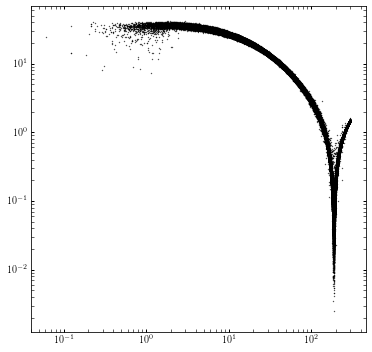

In [237]:
ax = figure(figsize=(6, 6))
scatter(r_mwlmc[r_cut], (acc[r_cut, 0]**2 + acc[r_cut, 1]**2 + acc[r_cut, 2]**2)**0.5, s=0.1, c='k')
xscale('log')
yscale('log')

In [238]:
savetxt('acclerations_mwlmc5_b1_1e6.txt', acc[r_cut])
savetxt('pos_mwlmc5_b1_1e6.txt', pp[r_cut])

In [226]:
pygadgetreader.readsnap('gadget3_MWLMC5_100M_b1_dmhalopart_elgato_001', 'pot', 'dm')

Returning DM    Potential


array([ -603.59674072,  -597.44714355,  -597.76538086, ..., -2857.72680664,
       -2771.85595703, -3043.56274414], dtype=float32)